## Installing PyCaret

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)


[PyCaret](https://pycaret.readthedocs.io/en/latest/) is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

In [ ]:
!pip install pycaret[full]
!pip install interpret-community

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
from numpy import sum as arraysum

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_preprocessed.csv')
dataset.drop(['index'], axis=1, inplace=True)
dataset.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
0,2,0,Warm Cool,1,3,950000.0,4,918.0,2 Story,Row Inside,2,4,Common Brick,Slate,Hardwood,1,1,652.0,Ward 2,2017,1,78,50,153.0
1,2,0,Warm Cool,1,3,830000.0,4,1335.0,3 Story,Row Inside,3,4,Brick/Stone,Built Up,Hardwood,1,0,560.0,Ward 1,2016,1,116,47,222.5
2,2,1,Warm Cool,1,3,1120000.0,3,1464.0,2 Story,Row Inside,3,4,Stucco,Built Up,Hardwood,2,1,1015.0,Ward 2,2017,1,132,48,244.0
3,1,1,Warm Cool,1,2,915000.0,5,1152.0,2 Story,Row Inside,1,4,Common Brick,Metal- Sms,Hardwood,1,1,900.0,Ward 2,2017,1,141,53,192.0
4,2,0,Warm Cool,1,2,1080000.0,3,1494.0,3 Story,Row End,3,4,Common Brick,Comp Shingle,Hardwood,1,1,609.0,Ward 2,2018,1,118,49,249.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231 entries, 0 to 7230
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             7231 non-null   int64  
 1   HF_BATHRM          7231 non-null   int64  
 2   HEAT               7231 non-null   object 
 3   AC                 7231 non-null   int64  
 4   BEDRM              7231 non-null   int64  
 5   PRICE              7231 non-null   float64
 6   SALE_NUM           7231 non-null   int64  
 7   GBA                7231 non-null   float64
 8   STYLE              7231 non-null   object 
 9   STRUCT             7231 non-null   object 
 10  GRADE              7231 non-null   int64  
 11  CNDTN              7231 non-null   int64  
 12  EXTWALL            7231 non-null   object 
 13  ROOF               7231 non-null   object 
 14  INTWALL            7231 non-null   object 
 15  KITCHENS           7231 non-null   int64  
 16  FIREPLACES         7231 

In [4]:
dataset.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,GRADE,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
count,7231.000000,7231.000000,7231.000000,7231.000000,7.231000e+03,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000
mean,2.181856,0.649288,0.797815,3.311990,6.580532e+05,3.728945,1507.406859,1.958512,3.962799,1.203706,0.445996,2669.437837,2016.733370,0.648458,79.577375,45.053520,214.216388
std,0.867729,0.565318,0.401657,0.942331,2.369446e+05,1.450365,499.325707,0.997060,0.755157,0.577702,0.671970,1954.302020,0.682516,0.477485,32.008130,17.413157,55.783594
min,1.000000,0.000000,0.000000,0.000000,2.510000e+05,2.000000,407.000000,1.000000,1.000000,0.000000,0.000000,327.000000,2016.000000,0.000000,0.000000,0.000000,69.333333
25%,2.000000,0.000000,1.000000,3.000000,4.500000e+05,3.000000,1180.000000,1.000000,3.000000,1.000000,0.000000,1419.000000,2016.000000,0.000000,69.000000,42.000000,175.500000
50%,2.000000,1.000000,1.000000,3.000000,6.500000e+05,3.000000,1404.000000,2.000000,4.000000,1.000000,0.000000,1992.000000,2017.000000,1.000000,87.000000,49.000000,206.000000
75%,3.000000,1.000000,1.000000,4.000000,8.355580e+05,4.000000,1706.000000,3.000000,4.000000,1.000000,1.000000,3365.000000,2017.000000,1.000000,100.000000,53.000000,243.200000
max,7.000000,7.000000,1.000000,13.000000,1.199000e+06,15.000000,5142.000000,6.000000,6.000000,5.000000,6.000000,34491.000000,2018.000000,1.000000,251.000000,75.000000,668.666667


In order to evaluate the predictions on completely unseen data, a sample of 1015 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1015 records were not available at the time when the machine learning experiment was performed.

In [5]:
data_unseen = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_preprocessed.csv')
data_unseen.drop(['index'], axis=1, inplace=True)
data_unseen.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
0,2,0,Hot Water Rad,0,4,990000.0,2,1707.0,3 Story,Semi-Detached,4,3,Common Brick,Metal- Sms,Hardwood,2,0,517.0,Ward 2,2018,0,118,55,213.375000
1,1,1,Warm Cool,1,3,899000.0,4,900.0,3 Story,Row Inside,1,4,Common Brick,Built Up,Hardwood,1,1,827.0,Ward 1,2018,0,138,57,150.000000
2,1,0,Forced Air,0,3,928000.0,2,1322.0,2 Story,Row Inside,2,3,Common Brick,Built Up,Hardwood,1,0,1125.0,Ward 1,2018,0,128,61,264.400000
3,1,0,Hot Water Rad,0,3,700000.0,3,1322.0,2 Story,Row Inside,2,4,Common Brick,Built Up,Carpet,1,0,1125.0,Ward 1,2018,1,128,61,220.333333
4,2,0,Forced Air,1,3,1050000.0,4,1128.0,2 Story,Row End,3,4,Common Brick,Built Up,Hardwood/Carp,2,0,640.0,Ward 1,2018,1,118,58,188.000000


In [6]:
data_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             1015 non-null   int64  
 1   HF_BATHRM          1015 non-null   int64  
 2   HEAT               1015 non-null   object 
 3   AC                 1015 non-null   int64  
 4   BEDRM              1015 non-null   int64  
 5   PRICE              1015 non-null   float64
 6   SALE_NUM           1015 non-null   int64  
 7   GBA                1015 non-null   float64
 8   STYLE              1015 non-null   object 
 9   STRUCT             1015 non-null   object 
 10  GRADE              1015 non-null   int64  
 11  CNDTN              1015 non-null   int64  
 12  EXTWALL            1015 non-null   object 
 13  ROOF               1015 non-null   object 
 14  INTWALL            1015 non-null   object 
 15  KITCHENS           1015 non-null   int64  
 16  FIREPLACES         1015 

In [ ]:
data_unseen.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
count,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000
mean,2.232035,0.625541,0.722511,3.375325,7.804024e+05,3.642424,1630.864935,3.789610,1.229870,0.541991,2929.629870,2018.0,0.574459,82.864502,48.562771,223.217724
std,1.061069,0.589754,0.447857,1.118294,4.991488e+05,1.455064,718.711115,0.820311,0.617676,0.836952,2337.797994,0.0,0.494532,30.990999,17.436470,65.341059
min,0.000000,0.000000,0.000000,1.000000,8.000000e+04,2.000000,576.000000,1.000000,0.000000,0.000000,453.000000,2018.0,0.000000,0.000000,0.000000,96.000000
25%,1.000000,0.000000,0.000000,3.000000,4.391262e+05,3.000000,1180.000000,3.000000,1.000000,0.000000,1504.000000,2018.0,0.000000,71.000000,43.000000,178.757937
50%,2.000000,1.000000,1.000000,3.000000,6.935000e+05,3.000000,1440.000000,4.000000,1.000000,0.000000,2120.000000,2018.0,1.000000,89.000000,51.000000,211.200000
75%,3.000000,1.000000,1.000000,4.000000,9.600000e+05,4.000000,1872.000000,4.000000,1.000000,1.000000,3600.000000,2018.0,1.000000,104.000000,61.000000,254.500000
max,10.000000,4.000000,1.000000,20.000000,5.650000e+06,15.000000,7940.000000,6.000000,4.000000,8.000000,29956.000000,2018.0,1.000000,218.000000,75.000000,748.250000


The training data are the transactions that happened from 2016 to 2018 which contains 7231 records and the testing data are from 2018 (after the latest transaction from training data) to 2018 which contains 2310 records. We split the testing data to the recent years to simulate real-world scenario.

In [7]:
print(f"Training Data: {dataset['SALEYEAR'].min()} to {dataset['SALEYEAR'].max()}")
print(f"Testing Data: {data_unseen['SALEYEAR'].min()} to {data_unseen['SALEYEAR'].max()}")

Training Data: 2016 to 2018
Testing Data: 2018 to 2018


## Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution.

In [8]:
import pycaret.regression as reg

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [9]:
regression_setup = reg.setup(data=dataset, target='PRICE', session_id=42, use_gpu=True, train_size=0.8, normalize=True, transformation=True,
                         categorical_features=['GRADE', 'HEAT', 'STYLE', 'AC', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD', 'RMDL', 'CNDTN'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'BEDRM', 'SALE_NUM', 'SQFT_ROOMS', 'AYB_SALEYEAR_DIFF', 'EYB_SALEYEAR_DIFF', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SALEYEAR'])

,Description,Value
0,session_id,42
1,Target,PRICE
2,Original Data,"(7231, 24)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5784, 109)"


## Baseline Model

When we evaluate a model's performance, it is important to create a baseline model so we can see whether our model improved from the baseline and how much did it improve. Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

Source: https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

In [10]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = dataset.drop('PRICE', axis=1)
y = dataset['PRICE']

def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
     scores = -scores.mean()
     return scores

dummy_reg_mean = DummyRegressor(strategy="mean")
dummy_reg_median = DummyRegressor(strategy='median')
dummy_reg_quantile = DummyRegressor(strategy='quantile', quantile=0.44)
dummy_reg_constant = DummyRegressor(strategy='constant', constant=450000)

print('Dummy Regressor (mean):', evaluate_baseline(dummy_reg_mean))
print('Dummy Regressor (median): ', evaluate_baseline(dummy_reg_median))
print('Dummy Regressor (quantile):', evaluate_baseline(dummy_reg_quantile))
print('Dummy Regressor (constant):', evaluate_baseline(dummy_reg_constant))

Dummy Regressor (mean): 231931.97336832358
Dummy Regressor (median):  242516.16876075938
Dummy Regressor (quantile): 244499.10204320285
Dummy Regressor (constant): 252708.41737758572


## Comparing All Models

When comparing models, we will create all models using 5 fold cross validation. We will focus on the Mean Absolute Error (MAE) because it is robuts to outliers which exist in our dataset.

In [11]:
models = reg.compare_models(fold=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,62267.0726,7.189952e+09,8.476973e+04,0.8719,0.1318,0.1002,3.142
lightgbm,Light Gradient Boosting Machine,64593.2753,7.617805e+09,8.725500e+04,0.8643,0.1354,0.1037,0.240
rf,Random Forest Regressor,66664.8278,8.340787e+09,9.132470e+04,0.8514,0.1401,0.1065,5.144
xgboost,Extreme Gradient Boosting,67361.2391,8.344042e+09,9.131018e+04,0.8514,0.1411,0.1077,1.702
et,Extra Trees Regressor,67874.2315,8.756882e+09,9.355108e+04,0.8440,0.1442,0.1085,5.432
gbr,Gradient Boosting Regressor,71020.5895,8.975882e+09,9.471561e+04,0.8401,0.1482,0.1153,1.230
huber,Huber Regressor,75022.0647,1.003430e+10,1.001368e+05,0.8212,0.1690,0.1217,0.654
br,Bayesian Ridge,75622.0318,9.937420e+09,9.965148e+04,0.8230,0.1641,0.1247,0.142
ridge,Ridge Regression,75726.6484,9.959466e+09,9.976185e+04,0.8226,0.1646,0.1249,0.040
llar,Lasso Least Angle Regression,75812.7930,9.990006e+09,9.991486e+04,0.8220,0.1655,0.1251,0.070


## Create a Model

![](https://avatars.mds.yandex.net/get-yablogs/51163/file_1500371746775/orig)

[CatBoost](https://catboost.ai/) is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

Based on the above benchmark, we can see that CatBoost is the top performing model with Mean Absolute Error of 7.791458e+04 during the 5-fold cross validation. Therefore, we will create a catboost model and tune its parameters in the next step.

In [12]:
catboost = reg.create_model('catboost', random_state=42)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,66523.8849,7.836296e+09,88522.8531,0.8585,0.1383,0.1059
1,57532.0418,6.570636e+09,81059.4588,0.8774,0.1271,0.0961
2,66780.1024,7.912025e+09,88949.5639,0.8652,0.1360,0.1048
3,61688.7774,7.222161e+09,84983.2961,0.8651,0.1354,0.1004
4,58909.8006,6.585314e+09,81149.9484,0.8889,0.1269,0.0953
5,61635.4736,6.847601e+09,82750.2356,0.8768,0.1304,0.1003
6,65724.8266,8.155334e+09,90306.8901,0.8555,0.1344,0.1022
7,62039.2087,7.183461e+09,84755.3004,0.8716,0.1308,0.0998
8,60459.6877,6.858537e+09,82816.2861,0.8771,0.1313,0.0981
9,58766.0872,6.489842e+09,80559.5569,0.8851,0.1213,0.0926


## Tuning the Model

In order to tune the model, we use the library [Hyperopt](http://hyperopt.github.io/hyperopt/), an open source hyperparameter optimization framework to automate hyperparameter search. It efficiently search large spaces and prune unpromising trials for faster results. Since it doesn't produce better model, we will proceed with the original model.

In [13]:
tuned_catboost = reg.tune_model(catboost, search_library = "tune-sklearn", search_algorithm="hyperopt",  optimize="MSE", n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68185.8589,8.312988e+09,91175.5873,0.8499,0.1421,0.1088
1,57657.3229,6.458854e+09,80366.9940,0.8795,0.1285,0.0970
2,68116.0980,8.113388e+09,90074.3498,0.8618,0.1370,0.1070
3,62492.3395,7.281522e+09,85331.8330,0.8640,0.1383,0.1026
4,59850.4008,6.782684e+09,82357.0518,0.8855,0.1295,0.0971
5,62761.3629,7.008744e+09,83718.2415,0.8739,0.1324,0.1024
6,67592.5615,8.353875e+09,91399.5331,0.8520,0.1380,0.1056
7,63786.9041,7.405096e+09,86052.8677,0.8676,0.1332,0.1024
8,60936.8964,6.956922e+09,83408.1641,0.8753,0.1325,0.0984
9,59206.0891,6.430242e+09,80188.7884,0.8861,0.1229,0.0948


#### Prediction Error Plot

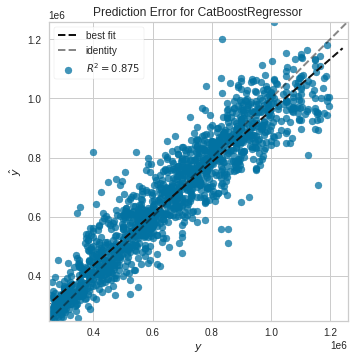

In [14]:
reg.plot_model(catboost, plot = 'error')

#### Learning Curve

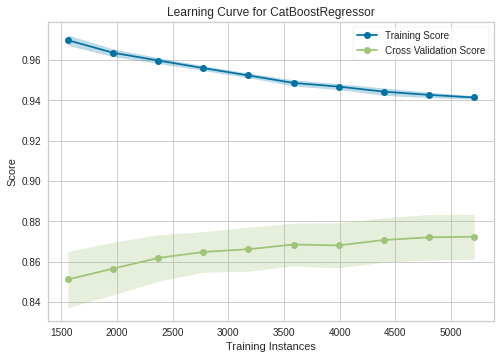

In [15]:
reg.plot_model(catboost, plot = 'learning')

#### Validation Curve

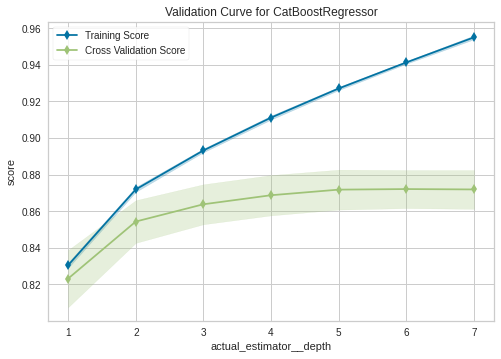

In [16]:
reg.plot_model(catboost, plot = 'vc')

#### Feature Importance Using SHAP

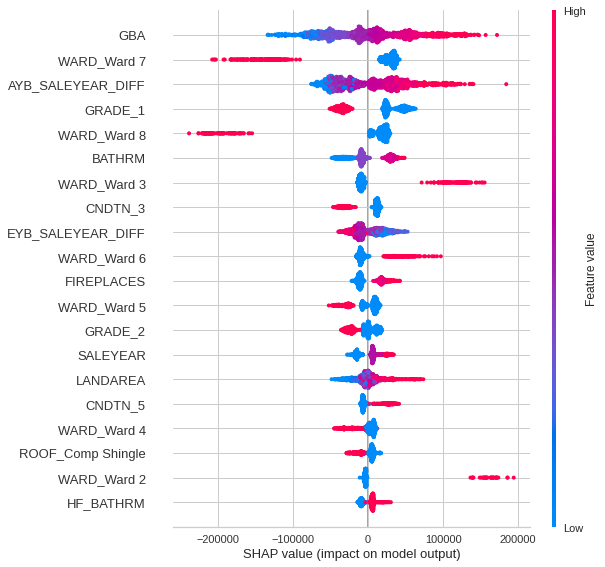

In [17]:
reg.interpret_model(catboost)

## Finalize and save the model

After evaluate the results on development data, we will finalize the model by train it using the whole development data and then evaluate it on the testing data to simulate real-world scenario.

In [18]:
final_model = reg.finalize_model(catboost)

In [19]:
reg.save_model(final_model, model_name='catboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['GRADE', 'HEAT',
                                                             'STYLE', 'AC',
                                                             'STRUCT', 'EXTWALL',
                                                             'ROOF', 'INTWALL',
                                                             'WARD', 'RMDL',
                                                             'CNDTN'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'BEDRM', 'SALE_NUM',
                                                           'SQFT_ROOMS',
                                                           'AYB_SALEYEAR_DIFF',
            

## Predictions on unseen data

During prediction, we will use prediction interval. Prediction interval is a quantification of the uncertainty on a prediction which provides a probabilistic upper and lower bounds on the estimate of an outcome variable.

In this case, we will use 95% prediction interval which means: *Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome*

![](https://machinelearningmastery.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)

Source: https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

In [20]:
saved_catboost = reg.load_model('catboost_model')

Transformation Pipeline and Model Successfully Loaded


A prediction interval is different from a confidence interval. A confidence interval quantifies the uncertainty on an estimated population variable, such as the mean or standard deviation. Whereas a prediction interval quantifies the uncertainty on a single observation estimated from the population.

In [21]:
data_unseen_features = data_unseen.drop('PRICE', axis=1)
data_unseen_target = data_unseen['PRICE']
predictions = reg.predict_model(saved_catboost, data=data_unseen_features)

In [22]:
label = predictions['Label']
y = data_unseen_target

We can estimate the standard deviation in the prediction direction using the following formula:

`SE = sqrt(1 / (N - 2) * e(i)^2 for i to N)`

In [23]:
sum_errs = arraysum((y - label)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
print(sum_errs, stdev)

12896151072290.123 112830.19360365305


We will use the significance level of 50%, which is 0.67449 standard deviations.

In [24]:
interval = 0.67449 * stdev
print(interval)

76102.83728372795


Once the interval is calculated, we can summarize the bounds on the prediction to the user.

In [25]:
lower, upper = label - interval, label + interval

## Evaluate Predictions

In [26]:
predictions

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,Label
0,2,0,Hot Water Rad,0,4,2,1707.0,3 Story,Semi-Detached,4,3,Common Brick,Metal- Sms,Hardwood,2,0,517.0,Ward 2,2018,0,118,55,213.375000,1.015168e+06
1,1,1,Warm Cool,1,3,4,900.0,3 Story,Row Inside,1,4,Common Brick,Built Up,Hardwood,1,1,827.0,Ward 1,2018,0,138,57,150.000000,7.498011e+05
2,1,0,Forced Air,0,3,2,1322.0,2 Story,Row Inside,2,3,Common Brick,Built Up,Hardwood,1,0,1125.0,Ward 1,2018,0,128,61,264.400000,6.922625e+05
3,1,0,Hot Water Rad,0,3,3,1322.0,2 Story,Row Inside,2,4,Common Brick,Built Up,Carpet,1,0,1125.0,Ward 1,2018,1,128,61,220.333333,7.644333e+05
4,2,0,Forced Air,1,3,4,1128.0,2 Story,Row End,3,4,Common Brick,Built Up,Hardwood/Carp,2,0,640.0,Ward 1,2018,1,118,58,188.000000,8.455424e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1,1,Warm Cool,1,3,5,1224.0,3 Story,Row End,2,3,Brick/Siding,Shake,Wood Floor,1,0,1438.0,Ward 8,2018,0,41,39,174.857143,3.044860e+05
1011,1,0,Warm Cool,1,3,2,1260.0,2 Story,Semi-Detached,1,3,Common Brick,Built Up,Hardwood,1,0,2625.0,Ward 8,2018,0,72,72,180.000000,2.806713e+05
1012,1,0,Warm Cool,1,2,3,832.0,2 Story,Semi-Detached,1,3,Common Brick,Comp Shingle,Hardwood,1,0,1528.0,Ward 8,2018,0,68,58,208.000000,2.437551e+05
1013,2,1,Forced Air,1,2,4,832.0,2 Story,Row Inside,2,5,Common Brick,Slate,Hardwood,1,0,1069.0,Ward 8,2018,1,77,51,138.666667,3.783899e+05


First, we will evaluate the number of records that are in our prediction interval. We can see that out of 1015 records, there are 637 records that are in the interval.

In [27]:
data_unseen.sample(10)

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
752,2,0,Hot Water Rad,1,3,465000.0,6,1272.0,2 Story,Row End,1,3,Vinyl Siding,Metal- Sms,Hardwood/Carp,1,0,684.0,Ward 6,2018,1,110,54,212.000000
519,1,1,Warm Cool,1,3,499500.0,4,1280.0,2 Story,Row Inside,1,3,Common Brick,Built Up,Hardwood,1,1,2000.0,Ward 4,2018,0,93,68,213.333333
210,2,0,Hot Water Rad,0,4,1065000.0,2,1912.0,2 Story,Multi,6,3,Common Brick,Metal- Sms,Hardwood,2,0,1374.0,Ward 2,2018,1,118,42,239.000000
611,1,1,Forced Air,0,3,400000.0,3,1024.0,2 Story,Single,1,3,Common Brick,Built Up,Hardwood,1,0,1999.0,Ward 4,2018,0,69,59,204.800000
914,2,0,Warm Cool,1,3,275000.0,2,1184.0,2 Story,Row Inside,1,3,Common Brick,Built Up,Hardwood,1,0,1554.0,Ward 7,2018,1,68,68,197.333333
534,2,0,Forced Air,1,3,500250.0,3,1184.0,2 Story,Semi-Detached,1,4,Common Brick,Built Up,Hardwood,1,0,2684.0,Ward 4,2018,1,71,51,197.333333
841,3,0,Forced Air,1,4,406000.0,3,820.0,1 Story,Single,1,4,Wood Siding,Comp Shingle,Hardwood,1,0,2000.0,Ward 7,2018,1,93,54,117.142857
199,2,0,Hot Water Rad,1,4,945000.0,3,1080.0,2 Story,Row Inside,3,3,Stone/Stucco,Metal- Sms,Hardwood,2,1,2555.0,Ward 2,2018,0,93,54,154.285714
215,3,1,Hot Water Rad,1,4,1092000.0,5,2070.0,3 Story,Row End,4,4,Brick Veneer,Built Up,Hardwood,1,1,4080.0,Ward 3,2018,0,86,46,258.750000
588,1,1,Warm Cool,1,3,532000.0,5,1200.0,2 Story,Row Inside,1,3,Common Brick,Metal- Sms,Hardwood,1,0,929.0,Ward 5,2018,0,96,75,171.428571


In [28]:
data_unseen.shape

(1015, 24)

In [29]:
data_unseen[(data_unseen['PRICE'] > lower) & (data_unseen['PRICE'] < upper)].shape

(637, 24)

In [30]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Max Error: " + str(max_error(data_unseen_target, predictions["Label"])))
print("Mean Absolute Error: " + str(mean_absolute_error(data_unseen_target, predictions["Label"])))
print("R2 Score: " + str(r2_score(data_unseen_target, predictions["Label"])))
print("Root Mean Squared Error: " + str(mean_squared_error(data_unseen_target, predictions["Label"], squared=False)))

Max Error: 653394.3540491124
Mean Absolute Error: 79837.02015288273
R2 Score: 0.7870558902427096
Root Mean Squared Error: 112718.97603734043
